# **Sample Solution: Data Handling and Exploration**
---

## Introduction

You will apply different data exploration, cleaning, and visualization techniques. It is very important to take some time to understand the data. 



## **About the data** 
---
The data set consists of 116,658 observations and 10 columns. It contains data of fifth-grade students, including their Math final exam grade.

* Student ID: identifies uniquely every student. **Note that no two students have the same ID.** 
* Gender
* School group: **There are only three groups school groups (A, B and C)**
* Effort regulation (effort)
* Family stress-level (stress)
* Help-seeking behavior (feedback)
* Regularity patterns of a student throughout the course (regularity)
* Critical-thinking skills (critical)
* Duration in minutes to solve final Math exam (minutes). **Should be numerical.**
* Final Math exam grade (grade) 


**The data set is available in the folder data**

In [1]:
# Your libraries here
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# tells matplotlib to embed plots within the notebook
%matplotlib inline


## **0 Load the data**
---

In [2]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-02',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  


In [5]:
### 0.1
df = pd.read_csv("./../../data/school_performance.csv", index_col=0)

In [6]:
# Let's see how the dataframe looks like
print("length of the dataframe:", len(df))
print("first rows of the dataframe:\n")
send(len(df), 1) 
df.head()

length of the dataframe: 116658
first rows of the dataframe:



,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
student_id,,,,,,,,,
20404.0,male,99,5.997184,7.692678,24.722538,99.000000,2.01733,20.0,99.00
26683.0,female,99,6.017588,8.848776,99.000000,99.000000,99.00000,30.0,3.93
32954.0,99,99,6.070632,6.704850,24.448975,7.218109,99.00000,99,3.67
42595.0,99,99,5.996371,99.000000,99.000000,5.578566,1.02639,21.0,99.00
28603.0,male,99,99.000000,6.780604,99.000000,99.000000,99.00000,99,2.86


<a id="section1"></a>
## **1 Data Exploration** 
---

As mentioned in class, it is good practice to report the percentage of missing values per feature together with the features' descriptive statistics. 

In order to understand the data better, in this exercise, you should:

1. Create a function that takes as input a DataFrame and returns a DataFrame with meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features. The process of data cleaning requires multiple iterations of data exploration. This function should be helpful for the later data cleaning exercises. 

2. Justify the choice of each descriptive statistic. What does each say about the data? Can you identify some irregularities? 

3. In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.  

4. Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify any outliers?



### 1.1 
**Create a function that takes as input a DataFrame and returns meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features.**


The function should make a separation between numerical and categorical variables and compute specific descriptive statistics for the numerical features (for example: mean, standard deviation, median, min, max, etc) and appropriate statistics only for the categorical features (for example: unique values, mode, frequency of mode, etc). The percentage of missing values needs to be computed for both.


In [7]:
### 1.1
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    ### BEGIN SOLUTION
    numerical = df.describe(include= ['float64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    #stats = df.describe(include= 'all') # alternative
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
    percentage = df.isnull().sum(axis = 0)*100 / len(df)
    stats.loc['missing_values'] = np.array(percentage)
    ### END SOLUTION
    return stats

In [8]:
stats = get_feature_stats(df)
stats

,effort,stress,feedback,regularity,critical,grade,gender,school_group,minutes
mean,52.489220,53.286495,57.247058,52.929855,50.165142,51.268639,NaN,NaN,NaN
std,46.510992,45.726888,42.073605,46.095884,48.855643,47.732656,NaN,NaN,NaN
50%,52.548300,57.699956,84.696590,78.691904,53.980298,52.775000,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,8,50
top,NaN,NaN,NaN,NaN,NaN,NaN,99,99,99
freq,NaN,NaN,NaN,NaN,NaN,NaN,58329,58329,58329
missing_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


### 1.2
**Justify the choice of each descriptive statistic. What do they say about the data? Can you identify some irregularities?** 

In the first step, we need to distinguish between numerical features and categorical features. From the data frame, it seems that the following features should be numeric: effort, stress, feedback, regularity, critical, minutes and grades.

In the lecture, we have seen that when computing the descriptive statistics of numeric features, we are interested in the center, the spread, and the shape of each feature. We will now focus on identifying the center and the spread, as tasks 1.3 and 1.4 will focus on the shape of the features (distribution). We compute the mean of all the numerical features to get an idea where their center is and the standard deviation to get an idea of the spread. In addition, we have also computed the median. Comparing the mean and the median can already give us insights on whether there might be outliers in our data (i.e. is the median far away from the mean?). Moreover we can compute the maximum and minimum of the features.

The categorical features are: gender and school group. For these features, we report the unique values of each feature to check for possible inconsistencies. For school group, we expect the unique values to be “A”, “B”, and “C”. For gender, we would expect male and female and possibly a third category indicating “neither of them”. Moreover, using top, we can find the most common values for a categorical feature and with freq their frequency of appearance in the feature.

For the percentage of missing values, you can first find all the non-null values of each feature using isnull() and then calculate their proportion of all values. You will see that actually, there are no NaN values in the data set. However, if you are attentive, you can spot that there are many ‘99’s in the data set. You could therefore also consider to calculate the percentage of ‘99’s for each feature.
By computing and analyzing all these measures for numerical and categorical features, we can observe the following irregularities:

* The school group has 8 unique values, which contradicts the information from the introduction, stating that the data set contains only three school groups
* There are only 58329 unique values for student_id, but 116658 rows in the data set
* The ‘minutes’ column appears to be categorical, although it is expected to be numerical ‘99’ is the maximum value for all numerical features (except student_id) and the top value for all categorical features. If you also calculated their percentage in each feature, you will see that they make up 50% of the entries for each feature (except for student_id)!


### 1.3
In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.



For this task, it is important to choose the appropriate type of graphs for each of the 9 main features (we excluded the student_id here, because plotting them would not provide us with any interesting information). 

For the categorical data an appropriate type of graph would be barplots, in order to visualize the distribution of the different values for the features. 
For the numerical data on the other hand, you could use histograms to visualize the distribution of the different values for the features.

Especially for the histograms **it is important that you adjust the plots (bin size) appropriately**, in order to be able to gain some insights. For instance, you could consider adjusting the sizes of the bins or the scales for the x- and y-axes. For this data set in particular, you might have noticed that the appearance of the ‘99’s may distort the plots, making it difficult to see the distribution of the valid data. One way to deal with this is to go back to the plots, once the ‘99s’ have been handled. 
Finally, you should use subplots to display all the nine plots in the same figure.

In [9]:
### 1.3

def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
         
    Hint
    ------
    To have multiple plots in a single figure see pyplot.figure

    """    
    df = df.copy()
    
    def plot_features(df, title):
        continuous_cols = list(df._get_numeric_data().columns)
        categorical_cols = list(set(df.columns) - set(continuous_cols))
        fig, axes = plt.subplots(3, 3, figsize=(15,10))
        for i, col in enumerate(df.columns):
            ax = axes[i // 3, i % 3]
            data = df[~df[col].isna()]
            if col in continuous_cols:
                sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
            elif col in categorical_cols:
                sns.countplot(data=data, x=col, ax=ax)
            else:
                print(col)
        fig.suptitle(title)
        fig.tight_layout()
    
    
    plot_features(df,"Raw data")
    plt.show()
    # For plotting purposes, we removed the 99 values from the numerical features 
    # to see the distributions more clearly
    df[(df == 99) | (df == '99')] = np.nan

    plot_features(df, "Data without 99 values")
    return plt
    

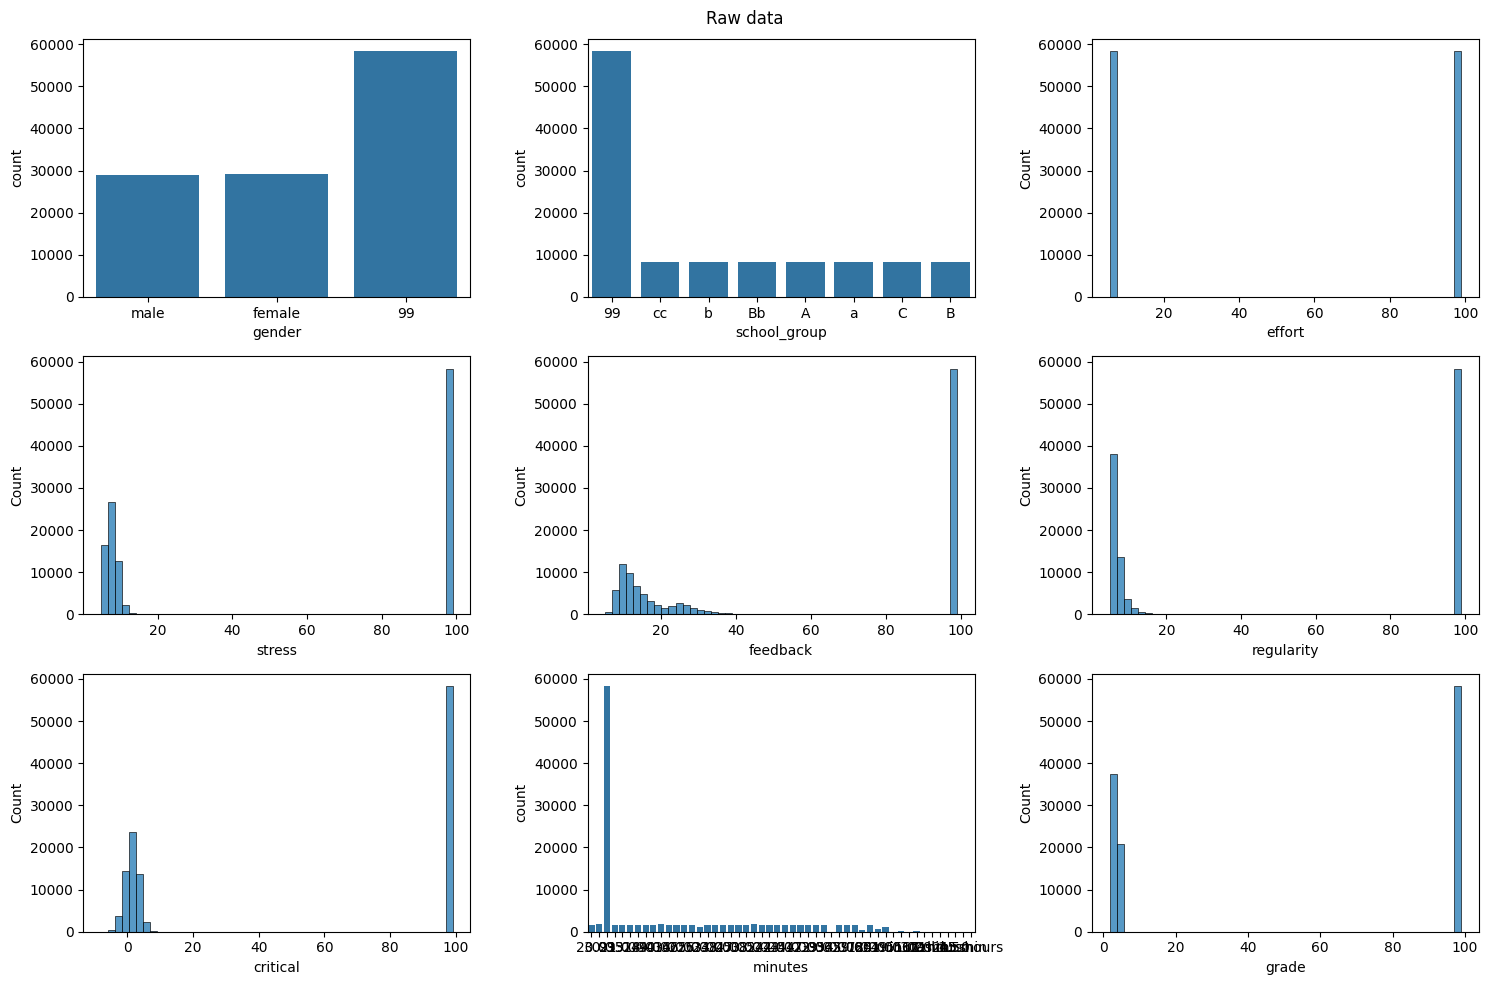

<Response [400]>

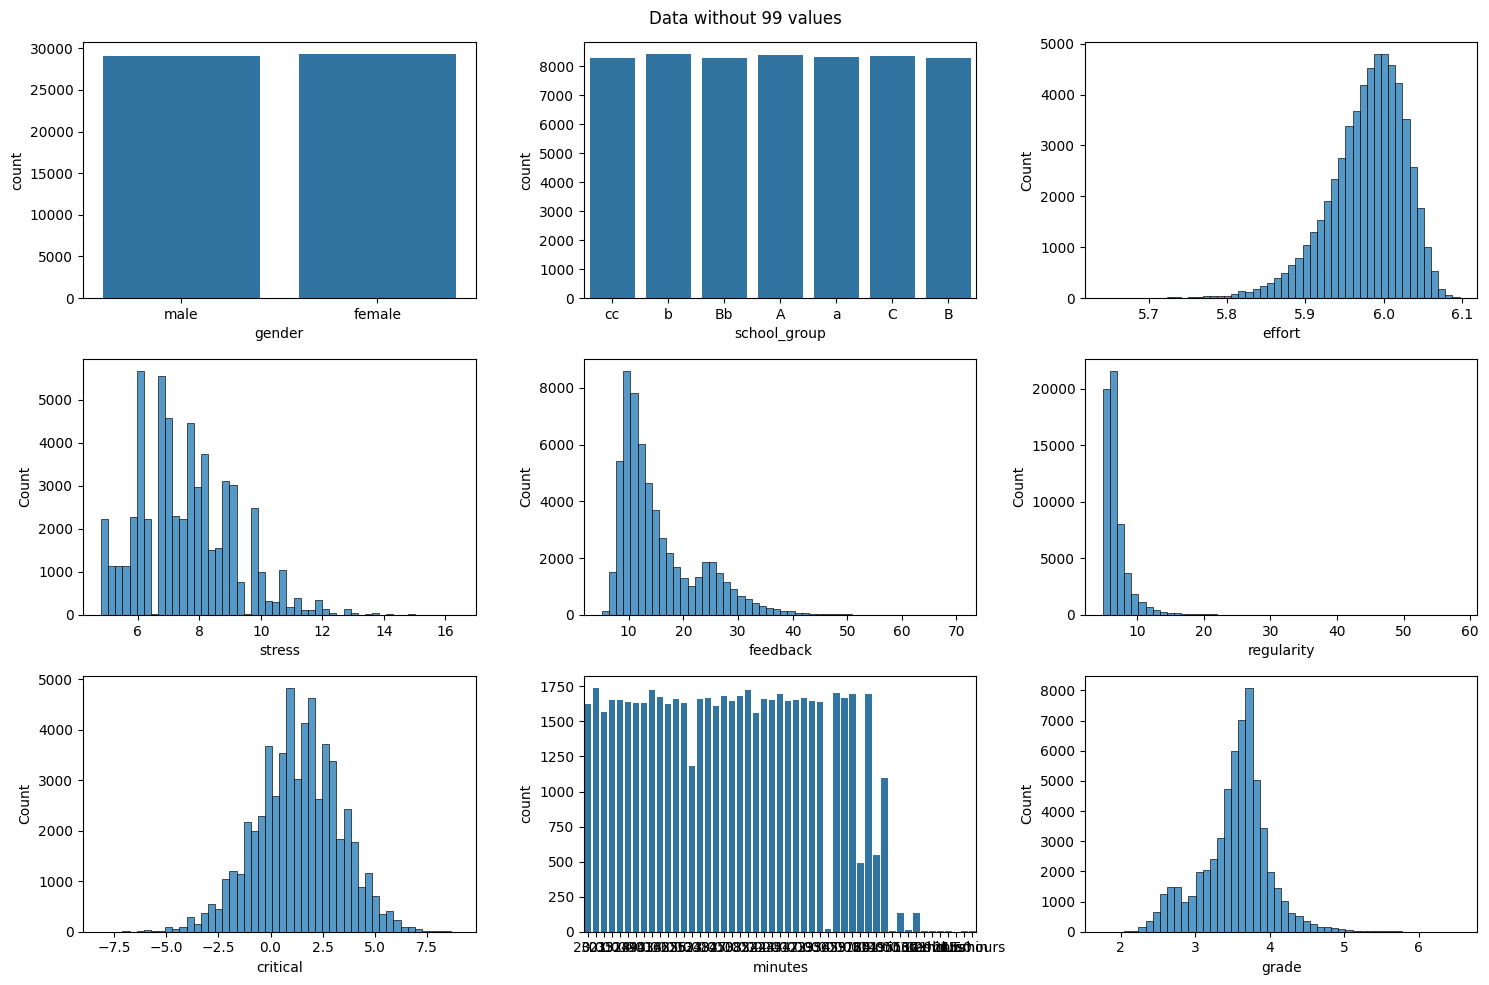

In [10]:
send(plot_features(df),13)

### 1.4
**Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify outliers?**

From the plots it can be clearly seen that the ‘99’s seem to be outliers. Once you have appropriately adjusted your plots, you will be able to identify the following distributions for the features:
* Gender: The data set is balanced between males and females (uniform).
School groups: Also the school groups appear to be rather balanced (roughly uniform)
* Effort: The distribution is slightly left skewed, could be weibull.
* Stress: The distribution is slightly right skewed, could be roughly gaussian or gamma distributed
* Feedback: The distribution is right skewed, could be gamma distributed
* Regularity: The distribution is right skewed, could be log normal. 
* Critical: The distribution looks gaussian
* Minutes: The distribution looks roughly uniform
* Grades: The distribution looks roughly gaussian




<a id="section2"></a>
## **2 Data Cleaning** 
---

Using your findings from the previous section, carefully continue to explore the data set and do the following:

1. Create a function to handle the missing values
2. Justify your decisions to treat the missing values
3. Create a function to handle the inconsistent data
4. Justify your decisions to treat the inconsistent data


### 2.1
**Create a function to handle the missing values**



In [11]:
### 2.1
def handle_missing_values(df):
    """
    Identifies and removes all missing values

    Parameters
    ----------
    df : DataFrame
      Containing missing values

    Returns
    -------
    df : DataFrame
      Without missing values

    Hint:
    -----
    Try to understand the pattern in the missing values    
    """
    ### BEGIN SOLUTION 
    df = df.replace([99,'99'], np.nan)
    df = df.groupby(['student_id']).first()
    ### END SOLUTION
    return df


In [12]:
df = handle_missing_values(df)
send(len(df.columns), 21.1)
print("number of columns: ", len(df.columns))

number of columns:  9


In [13]:
# take a look at the new dataframe stats and compare it with the original
get_feature_stats(df)

,effort,stress,feedback,regularity,critical,grade,gender,school_group,minutes
mean,5.978440,7.572990,15.494115,6.859709,1.330283,3.537279,NaN,NaN,NaN
std,0.048722,1.552971,7.330119,2.169821,2.005023,0.456478,NaN,NaN,NaN
50%,5.985351,7.401787,12.843072,6.227957,1.372255,3.600000,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,7,49
top,NaN,NaN,NaN,NaN,NaN,NaN,female,b,30.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,29295,8414,1740
missing_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


### 2.2 
**Justify your decisions to treat the missing values. Are there missing values? If so, how are the missing values encoded? Why are there missing values? Is there a pattern in the values missing?**


As we have seen from the previous analyses, the ‘99’s seem to encode missing values in the data set. Furthermore, we have seen that there are double as many entries as unique values for student_id in the data set. This can be further investigated by inspecting a few examples of student_id and exploring their entries. By doing this, we can see that for each student_id, there are 2 entries in the data set containing complementary data (i.e., if one entry contains ‘99’s, the real values can be found in the other entry of the same student_id). Hence by combining the data from both entries of a student_id, we can replace the ‘99’s with meaningful values and reduce the size of the dataframe by half.

### 2.3 
**Create a function to handle the inconsistent data**


In [14]:
### 2.3
def handle_inconsistent_data(df):
    """
    Identifies features with inconsistent data types and transforms features
    to the correct data type (numerical, object). 

    Parameters
    ----------
    df : DataFrame
      Containing inconsistent data

    Returns
    -------
    df : DataFrame
       With consistent data. All columns must be either numerical or categorical

    Hint:
    -----
    Don't forget to convert the features into the correct data type 
    """
    ### BEGIN SOLUTION
    mapping_time = {'1 hr': 60, '2hrs': 120, '2 hours': 120, '30 min': 30,
                    '45 min': 45, '60 minutes': 60, '1.5 hours':90 }
    mapping_group = {'a':'A', 'b':'B', 'c':'C', 'aa': 'A', 'Bb':'B', 'cc':'C'}

    df = df.replace({'minutes': mapping_time, 'school_group': mapping_group})
    df['minutes'] = pd.to_numeric(df['minutes'])
    ### END SOLUTION
    return df

In [15]:
df = handle_inconsistent_data(df)
print(len(df))
print(df.head())
print(get_feature_stats(df))

58329
            gender school_group    effort    stress   feedback  regularity  \
student_id                                                                   
1.0         female            A  5.974496  9.688888  24.563935    6.639488   
2.0           male            A  5.982265  9.788799  18.722110    5.705770   
3.0           male            C  6.011487  7.847762  15.577682    5.821650   
4.0         female            B  5.838975  6.155117  18.597183    5.137559   
5.0         female            C  6.013486  6.848094  12.498195    6.447001   

            critical  minutes  grade  
student_id                            
1.0        -1.795853     60.0   3.41  
2.0         0.952679    120.0   2.66  
3.0         2.913822    120.0   3.80  
4.0         2.481461     30.0   3.53  
5.0         2.015520     45.0   3.88  
                  effort    stress   feedback  regularity  critical  \
mean            5.978440  7.572990  15.494115    6.859709  1.330283   
std             0.048722  1.5529

### 2.4 
**Justify your decisions to treat the inconsistent data. Were there columns with inconsistent data types? How did you identify them?** 

As we have seen from the previous analyses, in addition to the missing values encoded as ‘99’s, there are two additional features with inconsistent data.  

First, there is the school group feature, for which we found 8 types of unique values, instead of the expected three. One of the expected types, the ‘99’s, has already been treated in the previous task. To find the remaining ones, you can for instance apply the ‘unique’ function to the school_group column. Doing so, you will see that instead of the original school groups (A,B and C) there are also rows with misspelled entries (a, b, c, aa, Bb, cc). To treat these inconsistencies you can replace the misspelled entries with their correct values.

Second, there is the minutes feature, which was expected to be numerical, but seems to be categorical. By inspecting the values for this feature, we find that the entries are very inconsistent, with values including strings that describe the units in different forms (‘min’, ‘minutes’, ‘hrs’ or ‘hours’) as well as values provided in hours. To treat this inconsistent data, we decide to transform all the values into minutes and remove the strings, before transforming this feature to a numeric column.

 

<a id="section3"></a>
## **3 Visualization** 
---

After cleaning the data, we can try to understand or extract insights from it. To do so, in this last section, you will do the following:
1. Create a function to show the relationship between numerical features.
2. Interpret your findings. What is correlation useful for? What insights can you get from it? 
3. Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature
4. Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?


### 3.1 
**Create a function to show the linear correlation between features.**


In [18]:
### 3.1
import seaborn as sns
def plot_correlation(df):
    """
    Builds upper triangular heatmap with pearson correlation between numerical variables

    Instructions
    ------------
    The plot must have:
    - An appropiate title
    - Only upper triangular elements
    - Annotated values of correlation coefficients rounded to three significant 
    figures
    - Negative correlation must be blue and possitive correlation red. 

    Parameters
    ----------
    df : DataFrame with data


    """
    ### BEGIN SOLUTION
    corr = np.round(df.corr(method='pearson', numeric_only=True), 3)
    mask = np.tril(corr)
    ax = plt.axes()
    heatmap = sns.heatmap(corr, annot=True, mask=mask, cmap='RdBu_r')
    ax.set_title('Correlation between variables')
    plt.show() 
    ### END SOLUTION


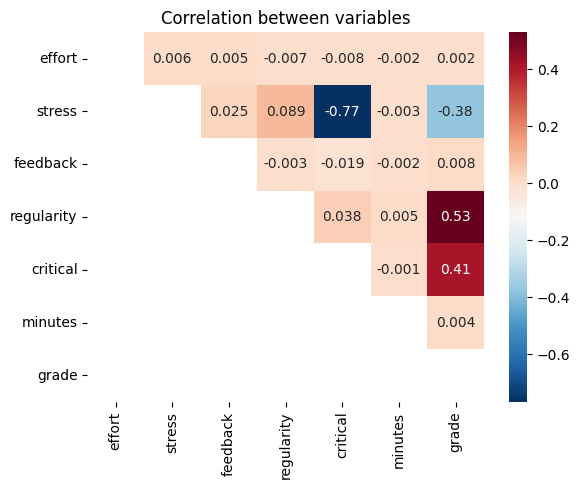

Datatype not supported


In [19]:
send(plot_correlation(df),31)

### 3.2
**Interpret your findings. What is correlation useful for? What insights can you get from it?** 

Pearson correlation can be useful to analyze LINEAR relationships between two variables. In case there is a linear dependency between variables, correlation allows us to quantify how strong this dependency is. However, it should also be noticed that strong correlations do not necessarily imply a causality of the observed effects. Moreover, note that Pearson correlation is only applicable to the numerical and not the categorical features. For the categorical data, other methods such as Chi square can be used to find associations between variables.   

If generated correctly, the heatmap with the Pearson correlations between the numerical features will provide the following insights:
* Stress is negatively correlated with critical thinking 
* Grade is positively correlated with regularity 
* Grade is positively correlated with critical thinking
* Grade is negatively correlated with stress 


### 3.3
**Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature.**


The plot should show the three features together. One way of doing this is using different colors to show the school grade (categorial feature) 

In [20]:
### 3.3
def plot_grades(df):
    """
    Visualizes the relationship between grade,  school group and other meaningful
    feature

    Parameters
    ----------
    df : DataFrame with data

    """
    ### BEGIN SOLUTION
    sns.jointplot(data = df, y = 'grade', x = 'regularity', hue = 'school_group')
    ### END SOLUTION

Datatype not supported


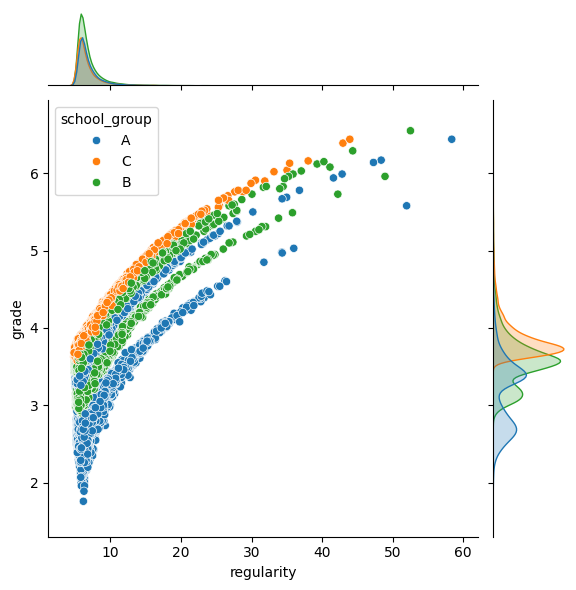

In [21]:
send(plot_grades(df),33)

### 3.4
**Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?**

The idea of this task was to use a plot that allows you to study the relationships of three variables at the same time. For this task, different solutions are possible, here we present an example using Seaborn’s jointplot and choosing regularity as the third feature. We plot regularity on the x-axis and grade on the y-axis, and choose the school group as the hue. This will generate a scatter plot with different colors for the school groups and additionally adds the density distributions for each group at the borders of the plot.

For this particular choice of plot and variables, we can observe that there is a general trend of better grades with higher regularity independent of the school group. This is in line with one of our observations from the Pearson correlations. However, here we also see that for the same regularity, students in school group C generally have higher grades than students from the other two groups. This is an interesting observation which could be further investigated in more analyses.
